## Aufgabe 20

In [2]:
mat_a = c(14.0, 8.8, 11.2, 14.2, 11.8, 6.4, 9.8, 11.3, 9.3, 13.6)
mat_b = c(13.2, 8.2, 10.9, 14.3, 10.7, 6.6, 9.5, 10.8, 8.8, 13.3)
order = c("RL", "RL", "LR", "RL", "LR", "RL", "RL", "RL", "LR", "RL")
diff = mat_a - mat_b
shoes = data.frame(order, mat_a, mat_b, diff)
shoes

order,mat_a,mat_b,diff
RL,14.0,13.2,0.8
RL,8.8,8.2,0.6
LR,11.2,10.9,0.3
RL,14.2,14.3,-0.1
LR,11.8,10.7,1.1
RL,6.4,6.6,-0.2
RL,9.8,9.5,0.3
RL,11.3,10.8,0.5
LR,9.3,8.8,0.5
RL,13.6,13.3,0.3


In [3]:
# H0: means equivalent
# H1: means not equivalent

# Check homogenity of variances to see if we need welch-modification
var.test(shoes$mat_a, shoes$mat_b)
qf(0.95, 9, 9)

# Computed quantile greater than test quantile --> accept homogenity (ratio pretty close to 1)


	F test to compare two variances

data:  shoes$mat_a and shoes$mat_b
F = 1.0555, num df = 9, denom df = 9, p-value = 0.9372
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2621782 4.2495488
sample estimates:
ratio of variances 
          1.055528 


[1] 3.178893

In [4]:
t.test(shoes$mat_a, shoes$mat_b, var.equal=TRUE, paired=FALSE)
qt(0.975, 18)  # Adapt probability to two sided test

# t-value of test ist less than qt --> can not reject H0 (means are equivalent)


	Two Sample t-test

data:  shoes$mat_a and shoes$mat_b
t = 0.36891, df = 18, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.924924  2.744924
sample estimates:
mean of x mean of y 
    11.04     10.63 


[1] 2.100922

In [5]:
cor(shoes$mat_a, shoes$mat_b)

[1] 0.9882255

In [6]:
t.test(shoes$mat_a, shoes$mat_b, var.equal=TRUE, paired=TRUE)
# t value of test is now bigger than qt --> reject H1
# Since mean of the differences is positive, Material A is probably better


	Paired t-test

data:  shoes$mat_a and shoes$mat_b
t = 3.3489, df = 9, p-value = 0.008539
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1330461 0.6869539
sample estimates:
mean of the differences 
                   0.41 


## Aufgabe 21

In [21]:
test_fun = function(n=20, lambda_0=10) {
    samples = rpois(n, lambda_0)
    logGamma = n * mean(samples) * log(mean(samples) / lambda_0) + n * (lambda_0 - mean(samples))
    2 * logGamma
}


In [22]:
times = 100000
all_samples = replicate(times, test_fun())

In [23]:
quant_probs = c(0.5, 0.75, 0.9, 0.95, 0.99)
qs_sample = quantile(all_samples, quant_probs)

In [24]:
qs_actual = qchisq(quant_probs, df=1)

In [27]:
comparison = data.frame(qs_sample, qs_actual)
comparison


,qs_sample,qs_actual
50%,0.491869,0.4549364
75%,1.315568,1.3233037
90%,2.752658,2.7055435
95%,3.821083,3.8414588
99%,6.801774,6.6348966


## Z10

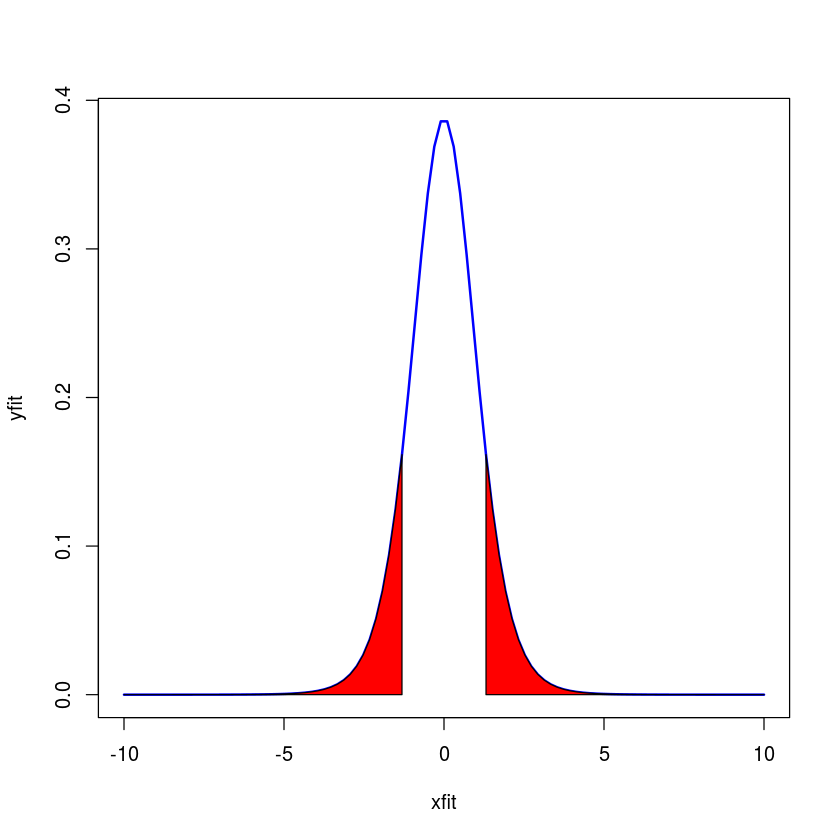

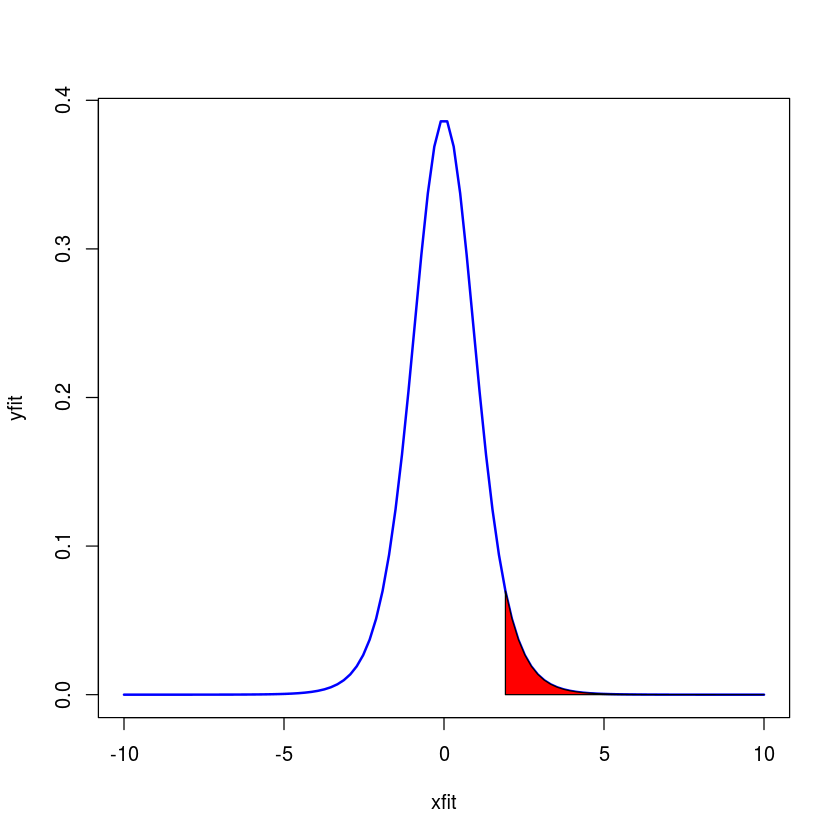

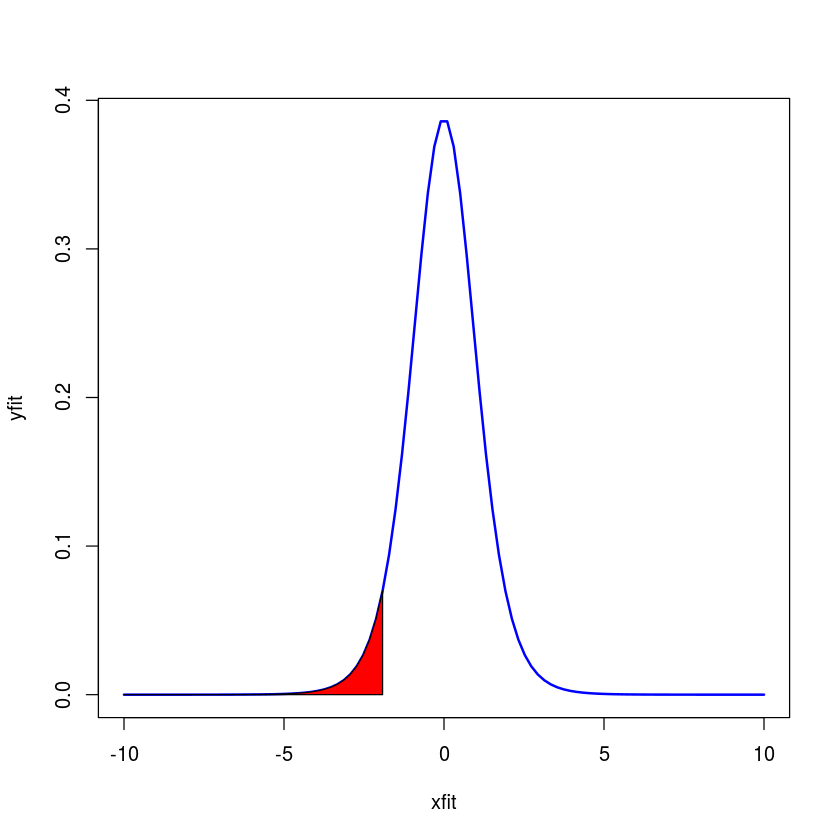

In [75]:
onesided = function(df, conf=0.95, alternative="greater", plot=TRUE) {
    xfit = seq(-10, 10,length=100) 
    yfit = dt(xfit, df)
    if (alternative == "greater") {
        lim = qt(conf, df)
    } else if (alternative=="less") {
        lim = qt(1 - conf, df)
    }
    if (plot) {
            plot(xfit, yfit, col="blue", lwd=2, type="l")
    }
    area_x = which.min(abs(xfit - lim))
    if (alternative == "greater") {
        start = area_x
        end = length(xfit)
    } else if (alternative=="less") {
        start = 0
        end = area_x
    } 
    x_poly = xfit[start: end]
    y_poly = yfit[start:end]
    x_poly = append(x_poly, xfit[area_x], after=0)
    y_poly = append(y_poly, 0, after=0)
    
    polygon(x_poly, y_poly, col="red")

}

twosided = function(df, conf=0.95) {
    onesided(df, conf + (1-conf) / 2, "greater")
    onesided(df, 1 - (1 - conf) / 2, "less", FALSE)

}

twosided(df=9, 0.8)
onesided(df=9, alternative="greater")
onesided(df=9, alternative="less")